In [1]:
import xarray as xr
import matplotlib.pyplot as plt

import os
import json
import xmitgcm as xm

### Import particles results

In [2]:
xr_output = xr.open_zarr("EddyParticles.zarr")

### Check particles trajectories

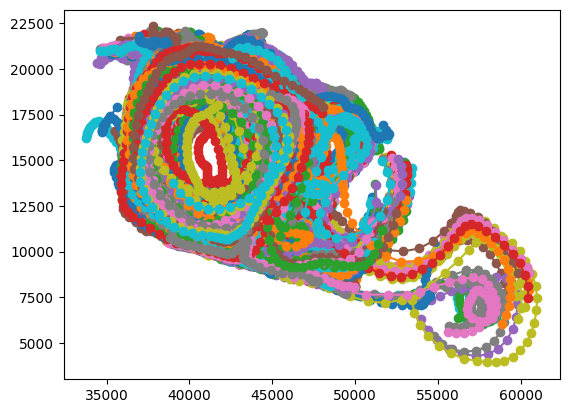

In [3]:
plt.plot(xr_output["lon"].T, xr_output["lat"].T, marker="o");

### Import MITgcm results

In [4]:
model = 'leman_sep2021'
with open('config.json', 'r') as file:
    config_plots = json.load(file)[os.uname().nodename][model]

datapath = config_plots['datapath']
gridpath = config_plots['gridpath']
ref_date = config_plots['ref_date']
dt = config_plots['dt']

In [5]:
# load velocity data
data_vel  = xm.open_mdsdataset(datapath, delta_t=dt,
                            ignore_unknown_vars=True, grid_dir=gridpath, 
                            geometry="cartesian", calendar="standard", ref_date=ref_date, 
                            prefix="3Dsnaps", endian='<')

### Plot everything together

In [6]:
date_start = xr_output.time.values[0,0]
z_start = xr_output['z'].values[0,0]

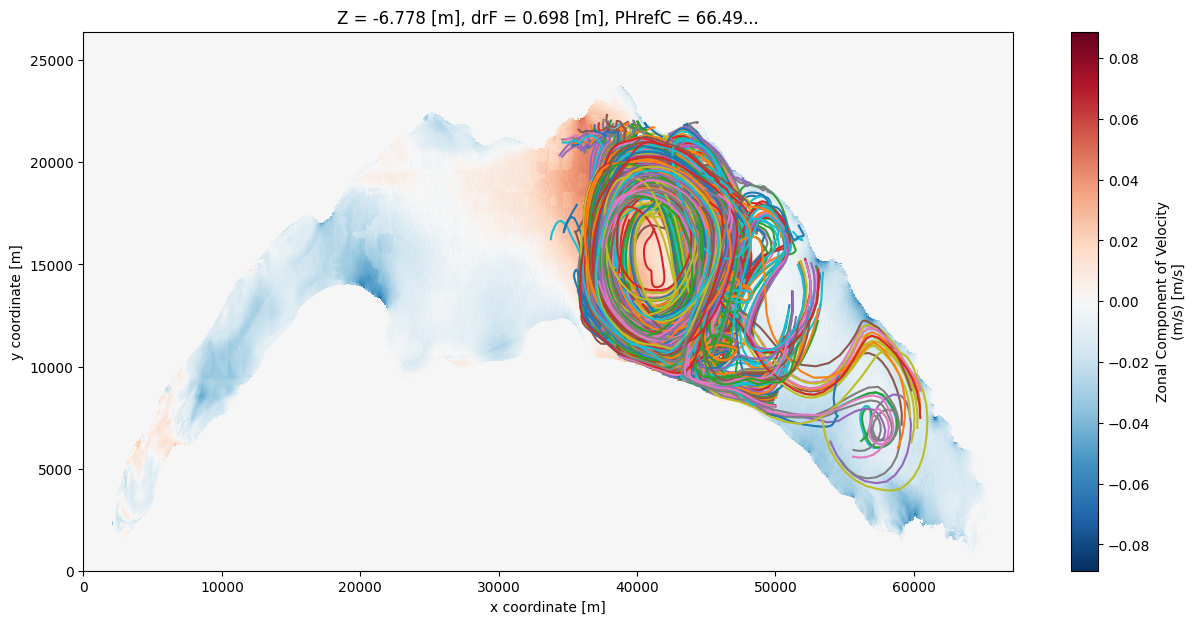

In [9]:
plt.figure(figsize=(15,7))
data_vel['UVEL'].sel(time=date_start, Z=z_start, method='nearest').plot();
plt.plot(xr_output["lon"].T, xr_output["lat"].T);
#plt.ylim(bottom=20500, top=22500)
#plt.xlim(left=40000, right=46000)
plt.savefig('./output/test_particles_traj')

In [69]:
xr_output.time.values[0,0]

np.datetime64('2021-07-26T03:00:00.000000000')

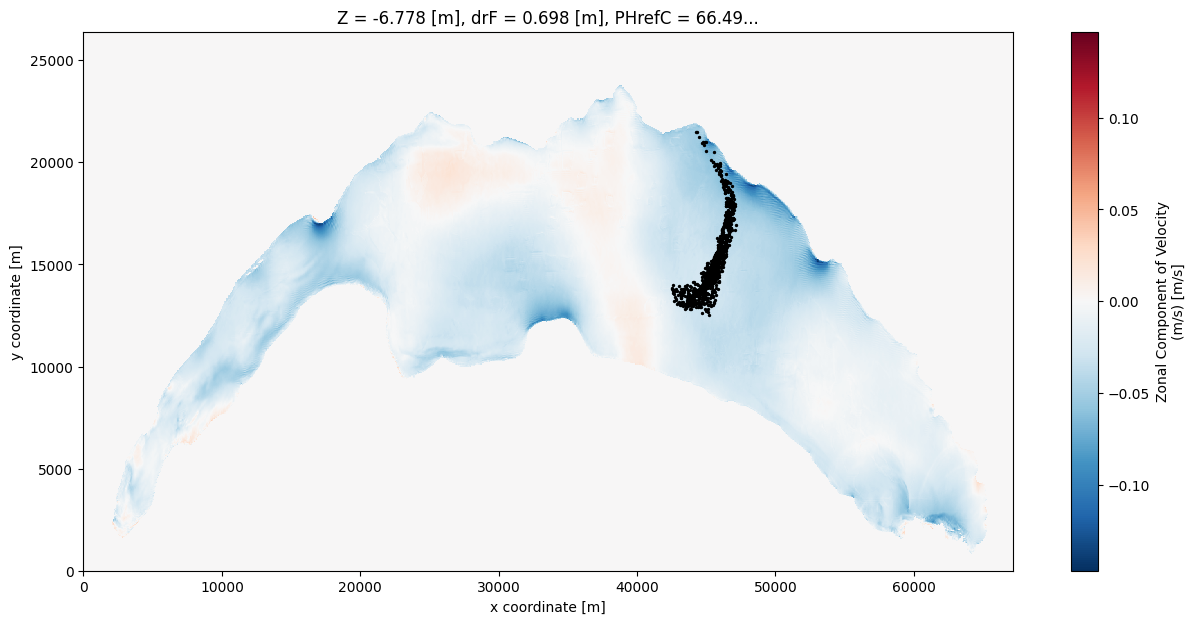

In [67]:
plt.figure(figsize=(15,7))
i+=1
date_plot=xr_output.time.values[0,i]
data_vel['UVEL'].sel(time=date_plot, Z=z_start, method='nearest').plot();
plt.scatter(xr_output["lon"].isel(obs=i).T, xr_output["lat"].isel(obs=i).T, color='black', s=2);
#plt.ylim(bottom=20500, top=22500)
#plt.xlim(left=40000, right=56000)
plt.savefig('./output/test_particles_traj')